Loading CIFAR-10 dataset...
170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step
Dataset loaded: 50000 training samples, 10000 test samples
Image shape: (32, 32, 3) (color), (32, 32) (grayscale)


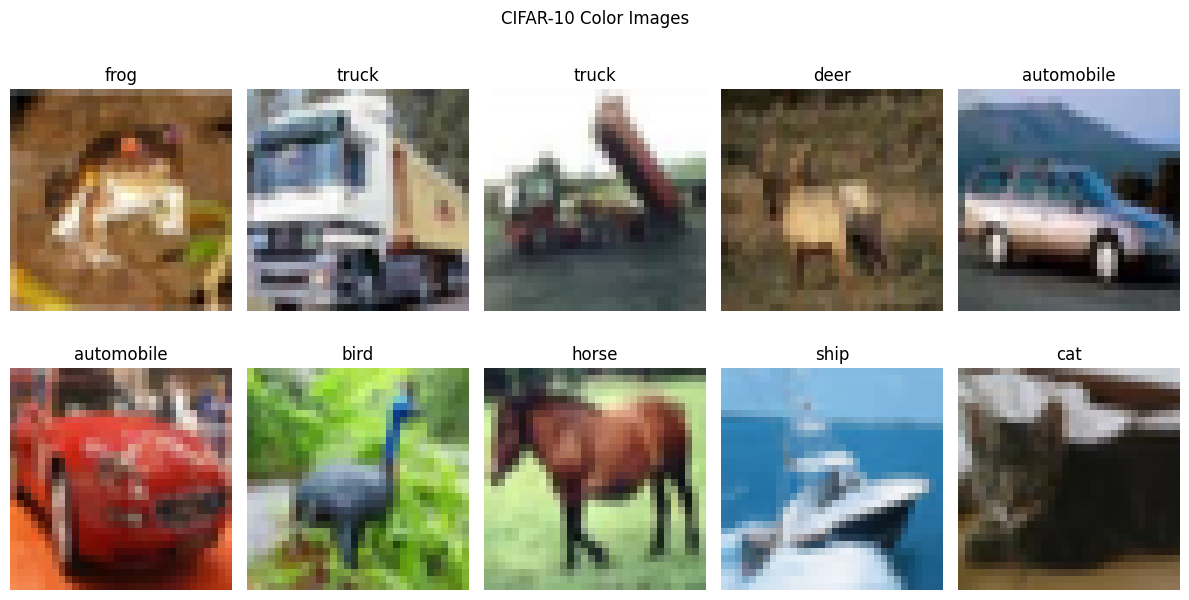

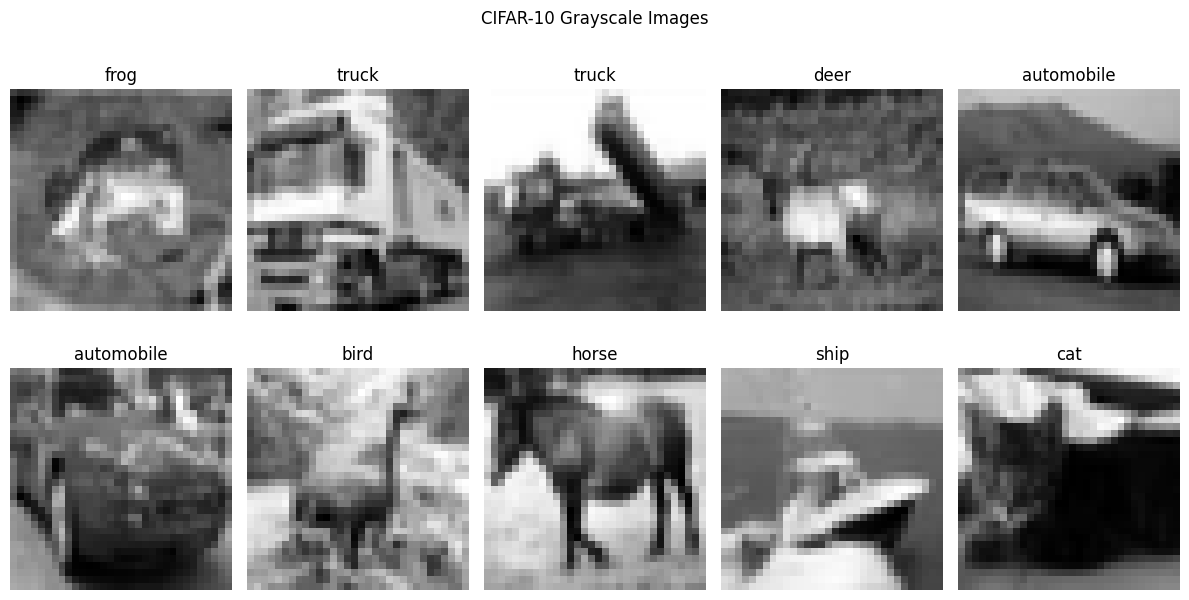

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import cifar10
from sklearn.model_selection import train_test_split


print("Loading CIFAR-10 dataset...")
(X_train_full, y_train_full), (X_test_full, y_test_full) = cifar10.load_data()

# Convert to grayscale
def rgb2gray(rgb):
    return np.dot(rgb[...,:3], [0.2989, 0.5870, 0.1140])

# Create grayscale versions
X_train_gray = np.array([rgb2gray(img) for img in X_train_full])
X_test_gray = np.array([rgb2gray(img) for img in X_test_full])

# Normalize data
X_train_full = X_train_full.astype('float32') / 255.0
X_test_full = X_test_full.astype('float32') / 255.0
X_train_gray = X_train_gray.astype('float32') / 255.0
X_test_gray = X_test_gray.astype('float32') / 255.0

# Flatten labels
y_train_full = y_train_full.flatten()
y_test_full = y_test_full.flatten()

# Define class names for CIFAR-10
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

print(f"Dataset loaded: {X_train_full.shape[0]} training samples, {X_test_full.shape[0]} test samples")
print(f"Image shape: {X_train_full.shape[1:]} (color), {X_train_gray.shape[1:]} (grayscale)")

# Display some sample images
plt.figure(figsize=(12, 6))
for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.imshow(X_train_full[i])
    plt.title(class_names[y_train_full[i]])
    plt.axis('off')
plt.tight_layout()
plt.suptitle("CIFAR-10 Color Images", y=1.05)
plt.show()

# Display corresponding grayscale images
plt.figure(figsize=(12, 6))
for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.imshow(X_train_gray[i], cmap='gray')
    plt.title(class_names[y_train_full[i]])
    plt.axis('off')
plt.tight_layout()
plt.suptitle("CIFAR-10 Grayscale Images", y=1.05)
plt.show()

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 13s 0us/step
Converting images to grayscale...
Extracting HOG features...
HOG feature extraction time: 1.85 seconds
HOG feature vector length: 324


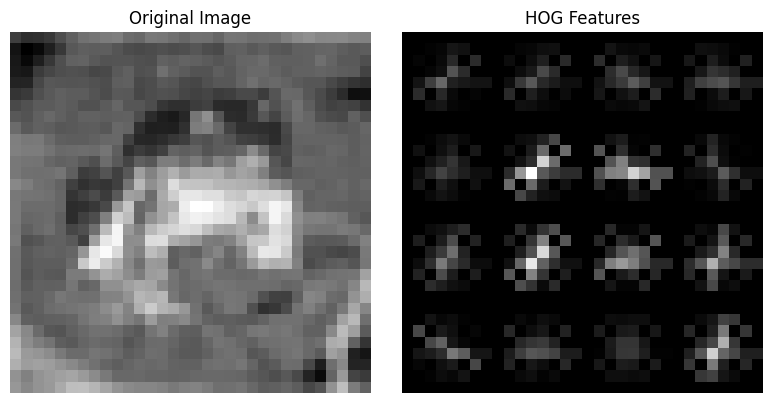

Training Logistic Regression classifier on HOG features...
Training time: 2.45 seconds
Inference time: 0.00 seconds
Accuracy: 0.4810
Precision: 0.4808
Recall: 0.4810
F1 Score: 0.4797

Classification Report:
              precision    recall  f1-score   support

    airplane       0.47      0.52      0.50       103
  automobile       0.52      0.56      0.54        89
        bird       0.44      0.42      0.43       100
         cat       0.40      0.33      0.36       103
        deer       0.39      0.40      0.39        90
         dog       0.36      0.36      0.36        86
        frog       0.50      0.57      0.53       112
       horse       0.55      0.53      0.54       102
        ship       0.57      0.50      0.53       106
       truck       0.58      0.58      0.58       109

    accuracy                           0.48      1000
   macro avg       0.48      0.48      0.48      1000
weighted avg       0.48      0.48      0.48      1000



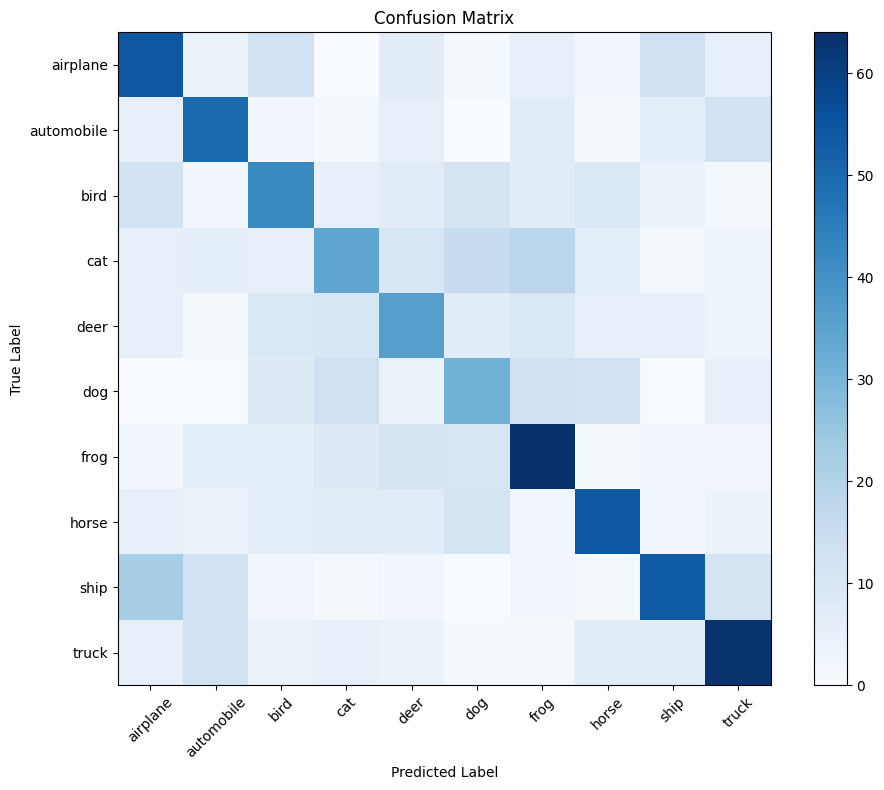

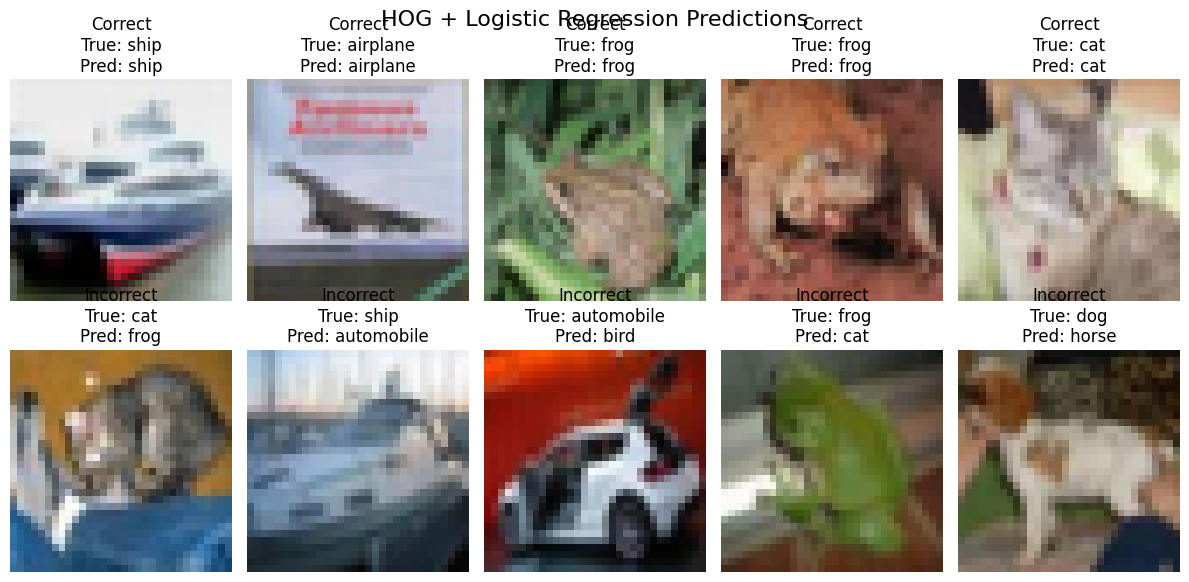

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from skimage.feature import hog
from skimage import exposure
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score
import time
from tensorflow.keras.datasets import cifar10
from skimage.color import rgb2gray

# Load data if not already loaded
(X_train, y_train), (X_test, y_test) = cifar10.load_data()
y_train = y_train.reshape(-1)
y_test = y_test.reshape(-1)

# Class names for CIFAR-10
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

# Preprocess images for HOG
def preprocess_for_hog(images):
    return np.array([rgb2gray(img) for img in images])

# Extract HOG features
def extract_hog_features(images, orientations=9, pixels_per_cell=(8, 8), cells_per_block=(2, 2)):
    features = []
    for img in images:
        fd = hog(img, orientations=orientations,
                pixels_per_cell=pixels_per_cell,
                cells_per_block=cells_per_block,
                block_norm='L2-Hys',
                visualize=False)
        features.append(fd)
    return np.array(features)

# Convert images to grayscale
print("Converting images to grayscale...")
X_train_gray = preprocess_for_hog(X_train[:5000])  # Using a subset
X_test_gray = preprocess_for_hog(X_test[:1000])
y_train_subset = y_train[:5000]
y_test_subset = y_test[:1000]

# Extract HOG features
print("Extracting HOG features...")
start_time = time.time()
X_train_hog = extract_hog_features(X_train_gray)
X_test_hog = extract_hog_features(X_test_gray)
hog_extraction_time = time.time() - start_time
print(f"HOG feature extraction time: {hog_extraction_time:.2f} seconds")
print(f"HOG feature vector length: {X_train_hog.shape[1]}")

# Visualize HOG features for a sample image
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 4), sharex=True, sharey=True)

sample_img = X_train_gray[0]
hog_features, hog_image = hog(sample_img, orientations=9,
                            pixels_per_cell=(8, 8),
                            cells_per_block=(2, 2),
                            block_norm='L2-Hys',
                            visualize=True)

ax1.imshow(sample_img, cmap='gray')
ax1.set_title('Original Image')
ax1.axis('off')

hog_image_rescaled = exposure.rescale_intensity(hog_image, in_range=(0, 10))

ax2.imshow(hog_image_rescaled, cmap='gray')
ax2.set_title('HOG Features')
ax2.axis('off')
plt.tight_layout()
plt.show()

# Train a classifier
print("Training Logistic Regression classifier on HOG features...")
start_time = time.time()
clf = LogisticRegression(random_state=42, max_iter=1000, n_jobs=-1)
clf.fit(X_train_hog, y_train_subset)
training_time = time.time() - start_time
print(f"Training time: {training_time:.2f} seconds")

start_time = time.time()
y_pred = clf.predict(X_test_hog)
inference_time = time.time() - start_time
print(f"Inference time: {inference_time:.2f} seconds")

accuracy = accuracy_score(y_test_subset, y_pred)
precision = precision_score(y_test_subset, y_pred, average='weighted')
recall = recall_score(y_test_subset, y_pred, average='weighted')
f1 = f1_score(y_test_subset, y_pred, average='weighted')

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

print("\nClassification Report:")
print(classification_report(y_test_subset, y_pred, target_names=class_names))

cm = confusion_matrix(y_test_subset, y_pred)
plt.figure(figsize=(10, 8))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names, rotation=45)
plt.yticks(tick_marks, class_names)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.tight_layout()
plt.show()

# Show examples of correct and incorrect predictions
plt.figure(figsize=(12, 6))
correct_idx = np.where(y_pred == y_test_subset)[0]
incorrect_idx = np.where(y_pred != y_test_subset)[0]


for i in range(5):
    if i < len(correct_idx):
        plt.subplot(2, 5, i+1)
        plt.imshow(X_test[correct_idx[i]], cmap='gray')
        plt.title(f"Correct\nTrue: {class_names[y_test_subset[correct_idx[i]]]}\nPred: {class_names[y_pred[correct_idx[i]]]}")
        plt.axis('off')


for i in range(5):
    if i < len(incorrect_idx):
        plt.subplot(2, 5, i+6)
        plt.imshow(X_test[incorrect_idx[i]], cmap='gray')
        plt.title(f"Incorrect\nTrue: {class_names[y_test_subset[incorrect_idx[i]]]}\nPred: {class_names[y_pred[incorrect_idx[i]]]}")
        plt.axis('off')

plt.tight_layout()
plt.suptitle("HOG + Logistic Regression Predictions", fontsize=16)
plt.subplots_adjust(top=0.88)
plt.show()

Converting images to grayscale...
Extracting LBP features...


/usr/local/lib/python3.11/dist-packages/skimage/feature/texture.py:385: UserWarning: Applying `local_binary_pattern` to floating-point images may give unexpected results when small numerical differences between adjacent pixels are present. It is recommended to use this function with images of integer dtype.
  warnings.warn(


LBP feature extraction time: 3.31 seconds
LBP feature vector length: 26


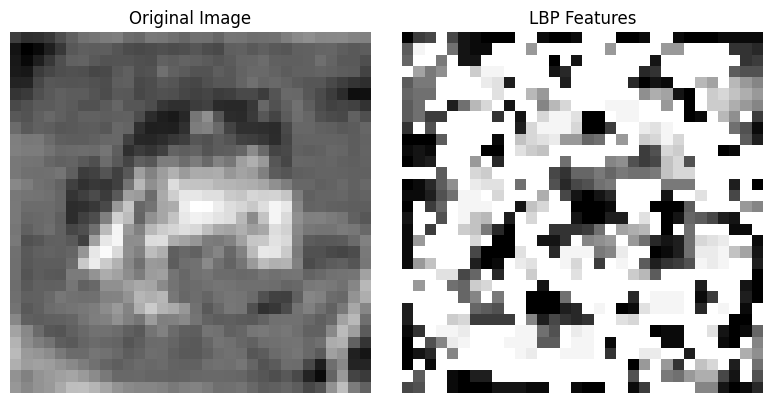

Training Random Forest classifier on LBP features...
Training time: 1.30 seconds
Inference time: 0.03 seconds
Accuracy: 0.2630
Precision: 0.2519
Recall: 0.2630
F1 Score: 0.2545

Classification Report:
              precision    recall  f1-score   support

    airplane       0.29      0.31      0.30       103
  automobile       0.27      0.29      0.28        89
        bird       0.11      0.06      0.08       100
         cat       0.20      0.13      0.15       103
        deer       0.26      0.31      0.28        90
         dog       0.17      0.22      0.19        86
        frog       0.37      0.48      0.42       112
       horse       0.22      0.20      0.21       102
        ship       0.32      0.32      0.32       106
       truck       0.29      0.28      0.29       109

    accuracy                           0.26      1000
   macro avg       0.25      0.26      0.25      1000
weighted avg       0.25      0.26      0.25      1000



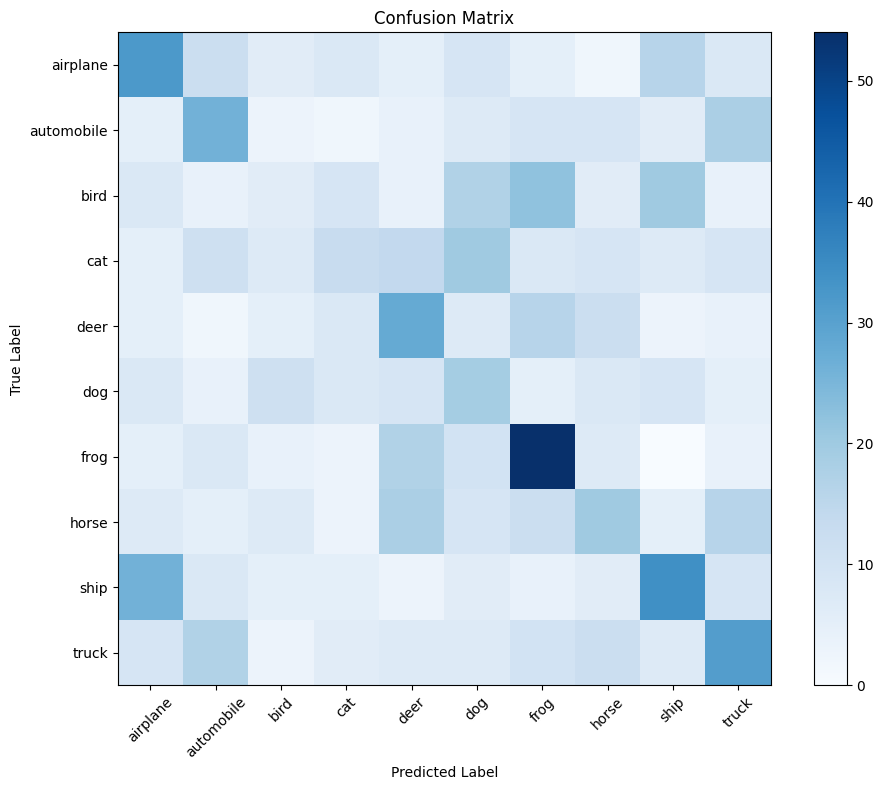

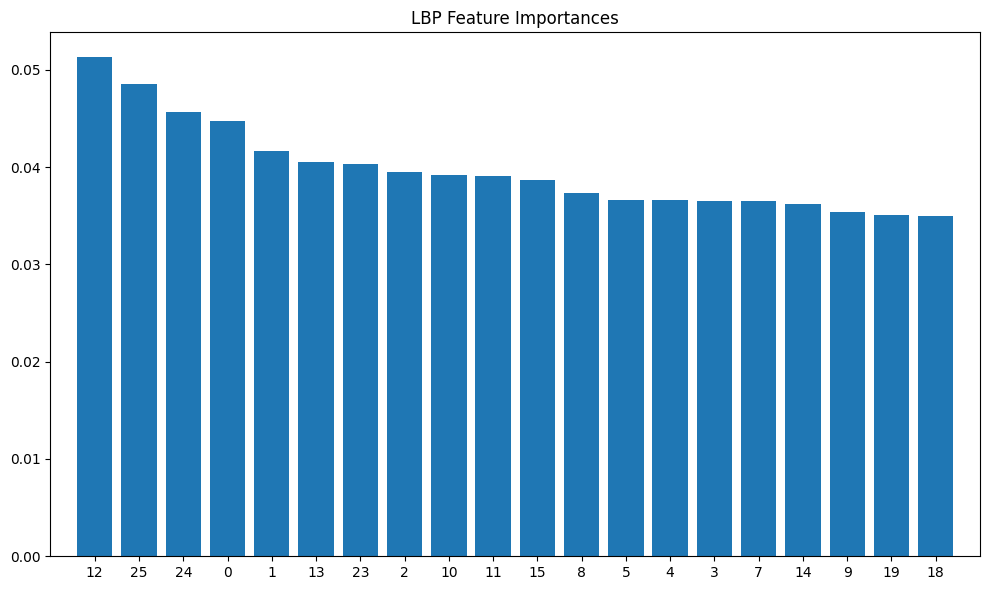

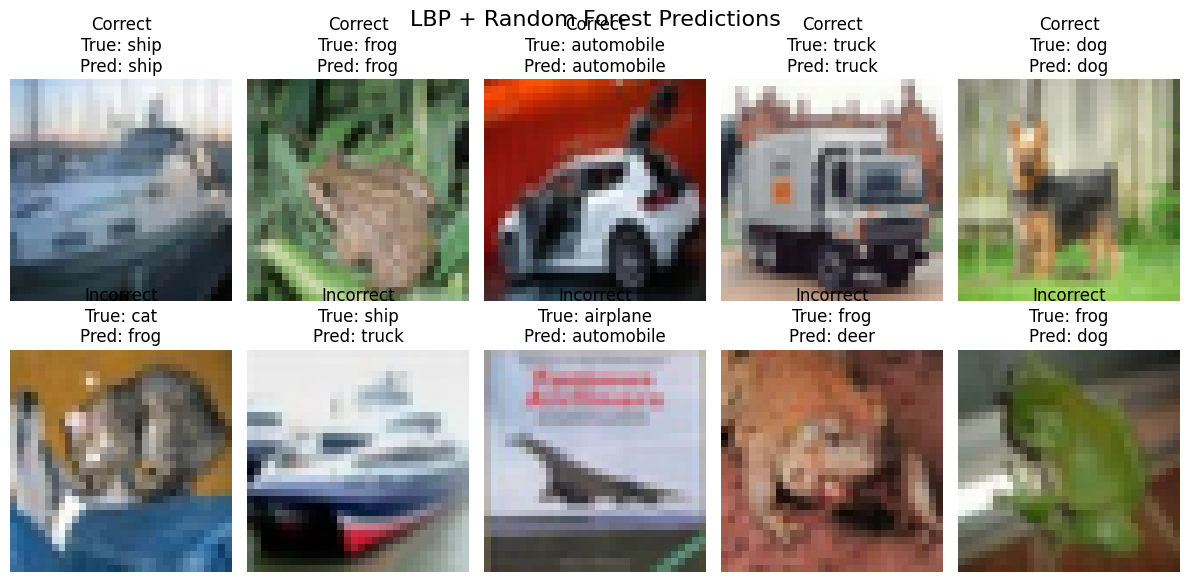

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from skimage.feature import local_binary_pattern
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score
import time
from tensorflow.keras.datasets import cifar10
from skimage.color import rgb2gray

# Load data if not already loaded
(X_train, y_train), (X_test, y_test) = cifar10.load_data()
y_train = y_train.reshape(-1)
y_test = y_test.reshape(-1)

# Class names for CIFAR-10
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

# Preprocess images for LBP
def preprocess_for_lbp(images):
    return np.array([rgb2gray(img) for img in images])

# Extract LBP features
def extract_lbp_features(images, radius=3, n_points=24, method='uniform'):
    features = []
    for img in images:
        lbp = local_binary_pattern(img, n_points, radius, method)
        # For the uniform LBP method, there are n_points+2 output values
        n_bins = n_points + 2 if method == 'uniform' else 2**n_points

        # Create histogram of the LBP features
        hist, _ = np.histogram(lbp, bins=n_bins, range=(0, n_bins), density=True)
        features.append(hist)
    return np.array(features)

# Convert images to grayscale
print("Converting images to grayscale...")
X_train_gray = preprocess_for_lbp(X_train[:5000])
X_test_gray = preprocess_for_lbp(X_test[:1000])
y_train_subset = y_train[:5000]
y_test_subset = y_test[:1000]

# Extract LBP features
print("Extracting LBP features...")
start_time = time.time()
radius = 3
n_points = 8 * radius
X_train_lbp = extract_lbp_features(X_train_gray, radius, n_points)
X_test_lbp = extract_lbp_features(X_test_gray, radius, n_points)
lbp_extraction_time = time.time() - start_time
print(f"LBP feature extraction time: {lbp_extraction_time:.2f} seconds")
print(f"LBP feature vector length: {X_train_lbp.shape[1]}")

# Visualize LBP features for a sample image
plt.figure(figsize=(8, 4))
sample_img = X_train_gray[0]
lbp = local_binary_pattern(sample_img, n_points, radius, 'uniform')

plt.subplot(1, 2, 1)
plt.imshow(sample_img, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(lbp, cmap='gray')
plt.title('LBP Features')
plt.axis('off')
plt.tight_layout()
plt.show()


print("Training Random Forest classifier on LBP features...")
start_time = time.time()
clf = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
clf.fit(X_train_lbp, y_train_subset)
training_time = time.time() - start_time
print(f"Training time: {training_time:.2f} seconds")

# Evaluate the classifier
start_time = time.time()
y_pred = clf.predict(X_test_lbp)
inference_time = time.time() - start_time
print(f"Inference time: {inference_time:.2f} seconds")

# Calculate performance metrics
accuracy = accuracy_score(y_test_subset, y_pred)
precision = precision_score(y_test_subset, y_pred, average='weighted')
recall = recall_score(y_test_subset, y_pred, average='weighted')
f1 = f1_score(y_test_subset, y_pred, average='weighted')

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

print("\nClassification Report:")
print(classification_report(y_test_subset, y_pred, target_names=class_names))

cm = confusion_matrix(y_test_subset, y_pred)
plt.figure(figsize=(10, 8))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names, rotation=45)
plt.yticks(tick_marks, class_names)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.tight_layout()
plt.show()

if hasattr(clf, 'feature_importances_'):

    importances = clf.feature_importances_
    indices = np.argsort(importances)[::-1]


    plt.figure(figsize=(10, 6))
    plt.title("LBP Feature Importances")
    plt.bar(range(min(20, len(importances))), importances[indices[:20]],
            align="center")
    plt.xticks(range(min(20, len(importances))), indices[:20])
    plt.xlim([-1, min(20, len(importances))])
    plt.tight_layout()
    plt.show()

plt.figure(figsize=(12, 6))
correct_idx = np.where(y_pred == y_test_subset)[0]
incorrect_idx = np.where(y_pred != y_test_subset)[0]


for i in range(5):
    if i < len(correct_idx):
        plt.subplot(2, 5, i+1)
        plt.imshow(X_test[correct_idx[i]])
        plt.title(f"Correct\nTrue: {class_names[y_test_subset[correct_idx[i]]]}\nPred: {class_names[y_pred[correct_idx[i]]]}")
        plt.axis('off')


for i in range(5):
    if i < len(incorrect_idx):
        plt.subplot(2, 5, i+6)
        plt.imshow(X_test[incorrect_idx[i]])
        plt.title(f"Incorrect\nTrue: {class_names[y_test_subset[incorrect_idx[i]]]}\nPred: {class_names[y_pred[incorrect_idx[i]]]}")
        plt.axis('off')

plt.tight_layout()
plt.suptitle("LBP + Random Forest Predictions", fontsize=16)
plt.subplots_adjust(top=0.88)
plt.show()

Extracting features for comparison...


/usr/local/lib/python3.11/dist-packages/skimage/feature/texture.py:385: UserWarning: Applying `local_binary_pattern` to floating-point images may give unexpected results when small numerical differences between adjacent pixels are present. It is recommended to use this function with images of integer dtype.
  warnings.warn(


Comparing feature extraction methods...
Training classifier on Raw Pixels features...
Raw Pixels: Accuracy = 0.2060, Training time = 22.49s, Test time = 0.00s
Training classifier on HOG features...
HOG: Accuracy = 0.4200, Training time = 1.48s, Test time = 0.00s
Training classifier on LBP features...
LBP: Accuracy = 0.2460, Training time = 0.09s, Test time = 0.00s
Training classifier on Canny Edges features...
Canny Edges: Accuracy = 0.1360, Training time = 4.94s, Test time = 0.00s
Training classifier on Sobel Edges features...
Sobel Edges: Accuracy = 0.2100, Training time = 7.72s, Test time = 0.00s


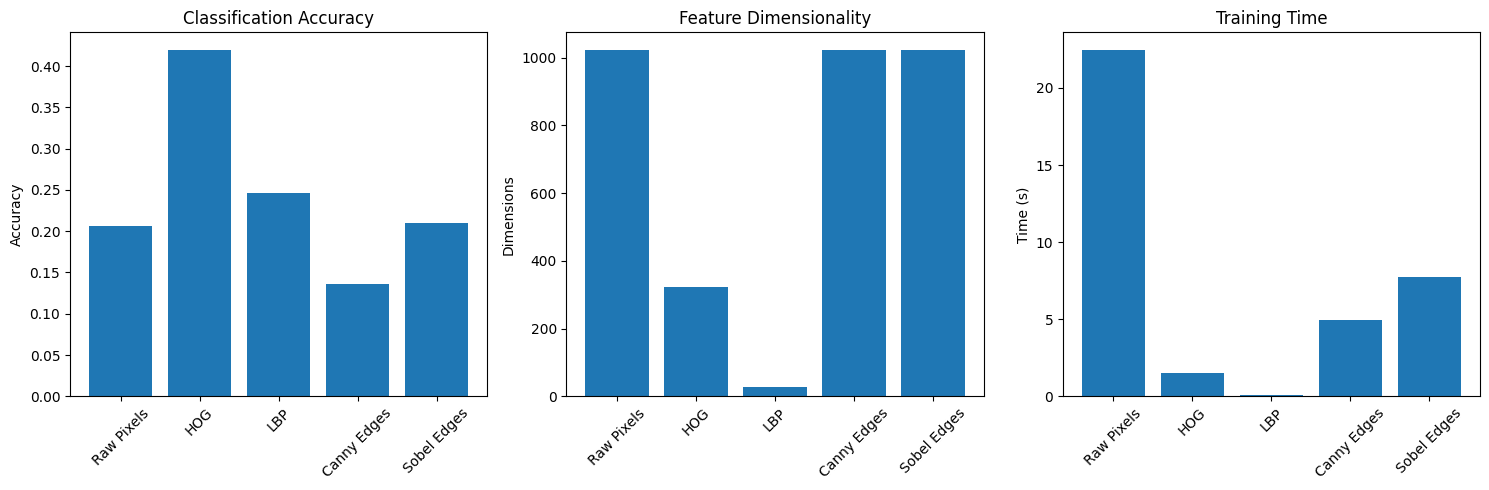

Creating PCA visualization of feature spaces...


<ipython-input-7-34bf77a8c333>:137: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


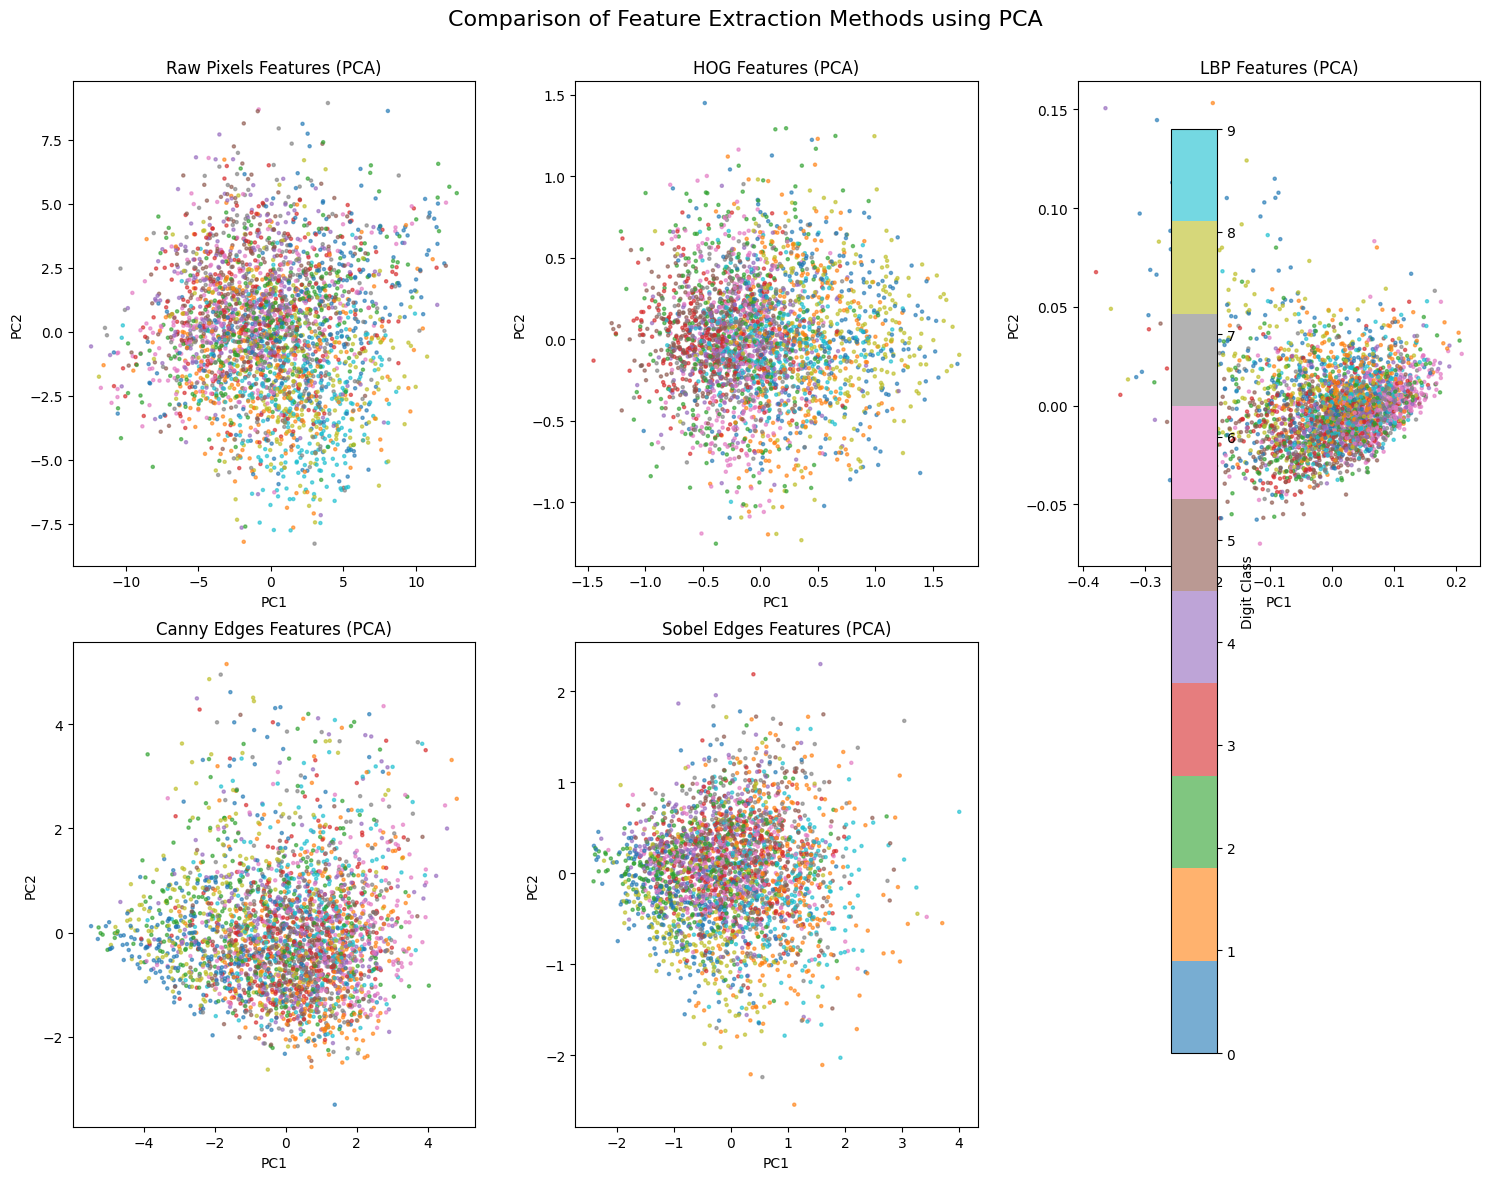

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score
from sklearn.svm import LinearSVC
from time import time

def compare_feature_methods(X_train_features_dict, X_test_features_dict, y_train, y_test):
    results = {}

    for name, features in X_train_features_dict.items():
        # Training
        print(f"Training classifier on {name} features...")
        t0 = time()
        clf = LinearSVC(random_state=42, max_iter=5000)
        clf.fit(features, y_train)
        train_time = time() - t0

        # Prediction
        t0 = time()
        y_pred = clf.predict(X_test_features_dict[name])
        test_time = time() - t0

        # Accuracy
        accuracy = accuracy_score(y_test, y_pred)

        results[name] = {
            'accuracy': accuracy,
            'train_time': train_time,
            'test_time': test_time,
            'feature_dim': features.shape[1]
        }

        print(f"{name}: Accuracy = {accuracy:.4f}, Training time = {train_time:.2f}s, Test time = {test_time:.2f}s")

    return results

subset_size = 3000
test_size = 500
X_train_subset = X_train_gray[:subset_size]
X_test_subset = X_test_gray[:test_size]
y_train_subset = y_train[:subset_size]
y_test_subset = y_test[:test_size]

# Raw pixels (baseline)
X_train_raw = X_train_subset.reshape(subset_size, -1)
X_test_raw = X_test_subset.reshape(test_size, -1)


# Extract features
print("Extracting features for comparison...")
X_train_hog = extract_hog_features(X_train_subset)
X_test_hog = extract_hog_features(X_test_subset)

X_train_lbp = extract_lbp_features(X_train_subset)
X_test_lbp = extract_lbp_features(X_test_subset)

X_train_canny = extract_edge_features(X_train_subset, 'canny')
X_test_canny = extract_edge_features(X_test_subset, 'canny')

X_train_sobel = extract_edge_features(X_train_subset, 'sobel')
X_test_sobel = extract_edge_features(X_test_subset, 'sobel')

# Compare methods
feature_dict_train = {
    'Raw Pixels': X_train_raw,
    'HOG': X_train_hog,
    'LBP': X_train_lbp,
    'Canny Edges': X_train_canny,
    'Sobel Edges': X_train_sobel
}

feature_dict_test = {
    'Raw Pixels': X_test_raw,
    'HOG': X_test_hog,
    'LBP': X_test_lbp,
    'Canny Edges': X_test_canny,
    'Sobel Edges': X_test_sobel
}

print("Comparing feature extraction methods...")
results = compare_feature_methods(feature_dict_train, feature_dict_test, y_train_subset, y_test_subset)

# Visualize the results
plt.figure(figsize=(15, 5))

# Accuracy comparison
plt.subplot(1, 3, 1)
names = list(results.keys())
accuracies = [results[name]['accuracy'] for name in names]
plt.bar(names, accuracies)
plt.title('Classification Accuracy')
plt.ylabel('Accuracy')
plt.xticks(rotation=45)

# Feature dimensionality
plt.subplot(1, 3, 2)
dims = [results[name]['feature_dim'] for name in names]
plt.bar(names, dims)
plt.title('Feature Dimensionality')
plt.ylabel('Dimensions')
plt.xticks(rotation=45)

# Training time
plt.subplot(1, 3, 3)
times = [results[name]['train_time'] for name in names]
plt.bar(names, times)
plt.title('Training Time')
plt.ylabel('Time (s)')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

# PCA Visualization to compare feature spaces
def visualize_features_pca(features_dict, y, title):
    plt.figure(figsize=(15, 12))

    for i, (name, features) in enumerate(features_dict.items()):
        # Apply PCA
        pca = PCA(n_components=2)
        features_reduced = pca.fit_transform(features)

        # Plot
        plt.subplot(2, 3, i+1)
        scatter = plt.scatter(features_reduced[:, 0], features_reduced[:, 1], c=y,
                   cmap='tab10', alpha=0.6, s=5)
        plt.title(f'{name} Features (PCA)')
        plt.xlabel('PC1')
        plt.ylabel('PC2')

    plt.colorbar(scatter, ax=plt.gcf().get_axes(), label='Digit Class')
    plt.tight_layout()
    plt.suptitle(title, fontsize=16)
    plt.subplots_adjust(top=0.92)
    plt.show()

# Visualize the feature spaces
print("Creating PCA visualization of feature spaces...")
visualize_features_pca(feature_dict_train, y_train_subset, 'Comparison of Feature Extraction Methods using PCA')

In [ ]:
#Solutions based on Deep Learning

Using device: cuda:0


100%|██████████| 170M/170M [00:13<00:00, 12.8MB/s]
/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=MobileNet_V2_Weights.IMAGENET1K_V1`. You can also use `weights=MobileNet_V2_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/mobilenet_v2-b0353104.pth" to /root/.cache/torch/hub/checkpoints/mobilenet_v2-b0353104.pth
100%|██████████| 13.6M/13.6M [00:00<00:00, 126MB/s]


Extracting features from training set using MobileNetV2...
Training features shape: (4000, 1280)
Feature extraction time: 11.76 seconds
Extracting features from validation set...
Extracting features from test set...
Test features shape: (1000, 1280)


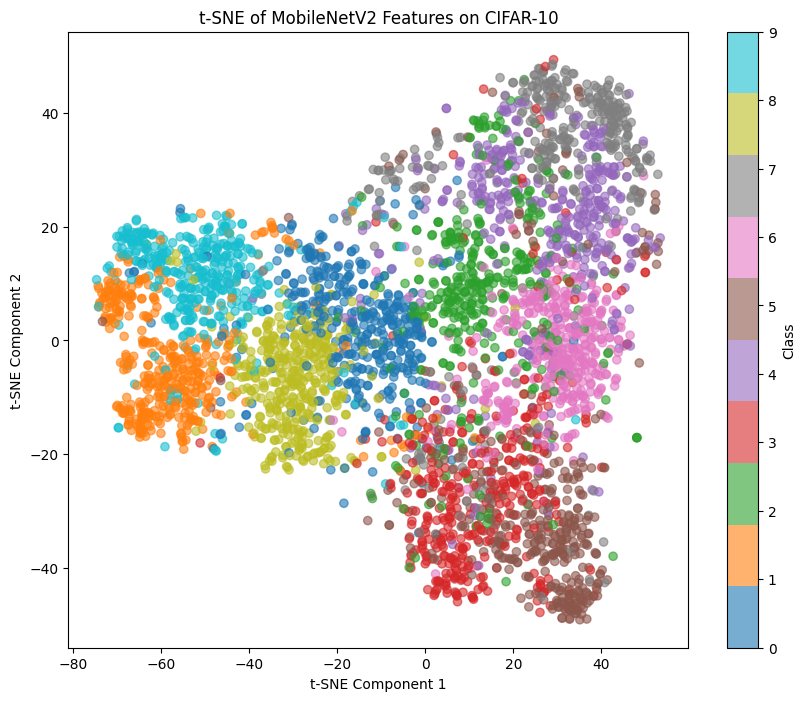

Training SVM classifier on MobileNet features...
Classifier training time: 13.45 seconds
Validation accuracy: 0.8340
Evaluating classifier on test set...
Evaluation time: 0.01 seconds
Test accuracy: 0.8200

Classification Report:
              precision    recall  f1-score   support

    airplane       0.80      0.75      0.77        84
  automobile       0.88      0.87      0.87        99
        bird       0.80      0.73      0.77       101
         cat       0.71      0.71      0.71        95
        deer       0.74      0.77      0.75       109
         dog       0.81      0.84      0.82       105
        frog       0.85      0.90      0.88       109
       horse       0.80      0.84      0.82        85
        ship       0.89      0.94      0.92       116
       truck       0.92      0.82      0.87        97

    accuracy                           0.82      1000
   macro avg       0.82      0.82      0.82      1000
weighted avg       0.82      0.82      0.82      1000



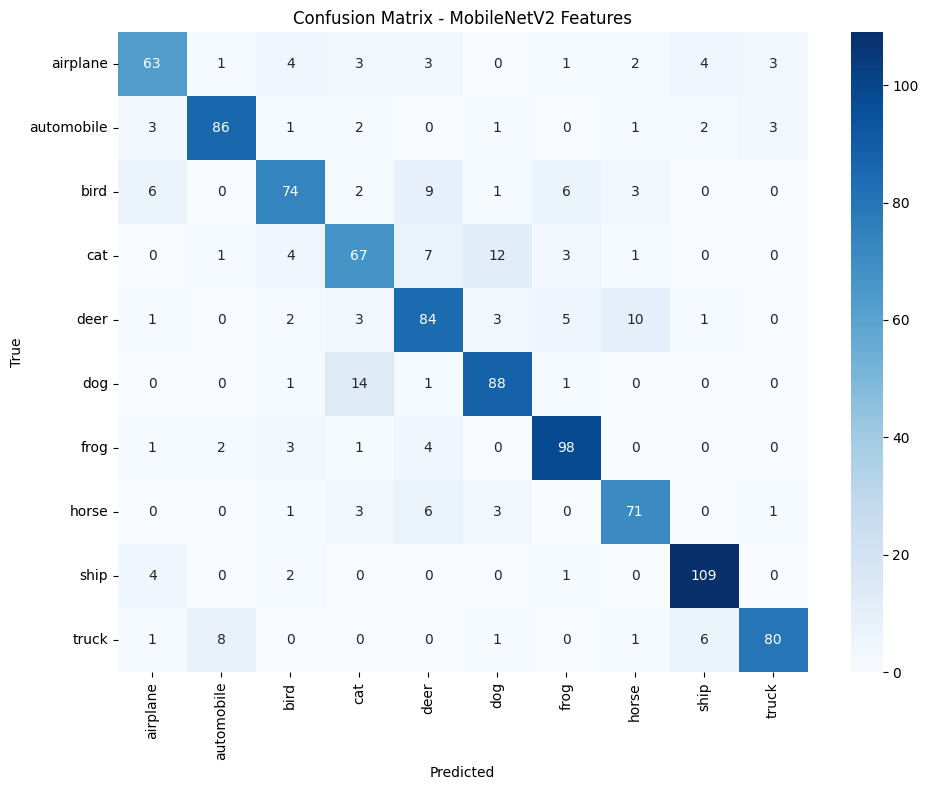

<Figure size 1500x1000 with 0 Axes>

In [ ]:
import torch
import torch.nn as nn
import torchvision.models as models
import torchvision.transforms as transforms
from torchvision.datasets import CIFAR10
from torch.utils.data import DataLoader, random_split
import matplotlib.pyplot as plt
import numpy as np
from sklearn.decomposition import PCA
from sklearn.svm import LinearSVC
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import seaborn as sns
import time

# Set device
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

# Define transformations for MobileNet
transform = transforms.Compose([
    transforms.Resize(224),  # MobileNet expects 224x224 images
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])  # ImageNet normalization
])

# Load CIFAR-10 dataset
batch_size = 64
train_dataset = CIFAR10(root='./data', train=True, download=True, transform=transform)
test_dataset = CIFAR10(root='./data', train=False, download=True, transform=transform)

# Use a smaller subset for faster processing
train_indices = torch.randperm(len(train_dataset))[:5000]
test_indices = torch.randperm(len(test_dataset))[:1000]

train_subset = torch.utils.data.Subset(train_dataset, train_indices)
test_subset = torch.utils.data.Subset(test_dataset, test_indices)

# Split training data for validation
train_size = int(0.8 * len(train_subset))
val_size = len(train_subset) - train_size
train_subset, val_subset = random_split(train_subset, [train_size, val_size])

train_loader = DataLoader(train_subset, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_subset, batch_size=batch_size, shuffle=False)
test_loader = DataLoader(test_subset, batch_size=batch_size, shuffle=False)

# Load pre-trained MobileNet model
class MobileNetFeatureExtractor(nn.Module):
    def __init__(self, version='v2'):
        super(MobileNetFeatureExtractor, self).__init__()
        if version == 'v2':
            base_model = models.mobilenet_v2(pretrained=True)
            self.features = base_model.features
        elif version == 'v3':
            base_model = models.mobilenet_v3_small(pretrained=True)
            self.features = base_model.features
        else:
            raise ValueError(f"Version {version} not supported")

        # Freeze parameters
        for param in self.features.parameters():
            param.requires_grad = False

    def forward(self, x):
        x = self.features(x)
        # Global average pooling
        return torch.mean(x, dim=[2, 3])

# Initialize the feature extractor
mobilenet_extractor = MobileNetFeatureExtractor('v2').to(device)
mobilenet_extractor.eval()  # Set to evaluation mode

# Function to extract features from the dataset
def extract_features(model, data_loader):
    features = []
    labels = []

    with torch.no_grad():
        for images, targets in data_loader:
            images = images.to(device)
            batch_features = model(images).cpu().numpy()
            features.append(batch_features)
            labels.append(targets.numpy())

    features = np.vstack(features)
    labels = np.concatenate(labels)

    return features, labels

# Extract features
print("Extracting features from training set using MobileNetV2...")
start_time = time.time()
train_features, train_labels = extract_features(mobilenet_extractor, train_loader)
extraction_time = time.time() - start_time
print(f"Training features shape: {train_features.shape}")
print(f"Feature extraction time: {extraction_time:.2f} seconds")

print("Extracting features from validation set...")
val_features, val_labels = extract_features(mobilenet_extractor, val_loader)

print("Extracting features from test set...")
test_features, test_labels = extract_features(mobilenet_extractor, test_loader)
print(f"Test features shape: {test_features.shape}")

# Visualize features using t-SNE or PCA
from sklearn.manifold import TSNE

# PCA first to reduce dimensions before t-SNE
pca = PCA(n_components=50)
train_features_pca = pca.fit_transform(train_features)

# t-SNE visualization
tsne = TSNE(n_components=2, random_state=42)
train_features_tsne = tsne.fit_transform(train_features_pca)

plt.figure(figsize=(10, 8))
scatter = plt.scatter(
    train_features_tsne[:, 0],
    train_features_tsne[:, 1],
    c=train_labels,
    cmap='tab10',
    alpha=0.6
)
plt.colorbar(scatter, label='Class')
plt.title('t-SNE of MobileNetV2 Features on CIFAR-10')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.show()

# Train a classifier on the extracted features
print("Training SVM classifier on MobileNet features...")
start_time = time.time()
classifier = LinearSVC(C=1.0, max_iter=5000)
classifier.fit(train_features, train_labels)
training_time = time.time() - start_time
print(f"Classifier training time: {training_time:.2f} seconds")

# Evaluate on validation set
val_pred = classifier.predict(val_features)
val_accuracy = accuracy_score(val_labels, val_pred)
print(f"Validation accuracy: {val_accuracy:.4f}")

# Evaluate on test set
print("Evaluating classifier on test set...")
start_time = time.time()
y_pred = classifier.predict(test_features)
evaluation_time = time.time() - start_time
print(f"Evaluation time: {evaluation_time:.2f} seconds")

accuracy = accuracy_score(test_labels, y_pred)
print(f"Test accuracy: {accuracy:.4f}")
print("\nClassification Report:")
print(classification_report(test_labels, y_pred, target_names=test_dataset.classes))

# Confusion matrix
plt.figure(figsize=(10, 8))
cm = confusion_matrix(test_labels, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=test_dataset.classes,
            yticklabels=test_dataset.classes)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix - MobileNetV2 Features')
plt.tight_layout()
plt.show()

# Feature visualization on test images
def get_class_activation_map(model, img):
    with torch.no_grad():
        features = model.features(img.unsqueeze(0).to(device))

    cam = features.mean(1).squeeze().cpu().numpy()

    from scipy.ndimage import zoom
    cam = zoom(cam, (img.shape[1]/cam.shape[0], img.shape[2]/cam.shape[1]))

    return cam

dataiter = iter(test_loader)
images, labels = next(dataiter)

plt.figure(figsize=(15, 10))
for i in range(5):
    img = images[i]
    label = labels[i].item()

    cam = get_class_activation_map(mobilenet_extractor, img)
    img_np = img.cpu().numpy().transpose(1, 2, 0)
    img_np = img_np

The code for DL algorithms is given below







In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.applications.vgg16 import VGG16, preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Model
import matplotlib.pyplot as plt
from keras.datasets import cifar10
import time

# Load CIFAR-10 dataset if not already loaded
(X_train, y_train), (X_test, y_test) = cifar10.load_data()
y_train = y_train.flatten()
y_test = y_test.flatten()

# Resize images to match VGG16 input size (224x224)
def resize_images(images):
    resized = []
    for img in images:
        img_resized = tf.image.resize(img, (224, 224))
        resized.append(img_resized)
    return np.array(resized)

# Function to extract features using VGG16
def extract_vgg16_features(images):
    # Resize images for VGG16
    print("Resizing images to 224x224...")
    images_resized = resize_images(images)

    # Load pre-trained VGG16 model without classification layers
    print("Loading VGG16 model...")
    base_model = VGG16(weights='imagenet', include_top=False, pooling='avg')

    # Create feature extraction model
    model = Model(inputs=base_model.input, outputs=base_model.output)

    # Prepare batch processing to handle memory constraints
    batch_size = 32
    num_images = len(images_resized)
    num_batches = int(np.ceil(num_images / batch_size))
    features = []

    print(f"Extracting features from {num_images} images in {num_batches} batches...")
    start_time = time.time()

    # Process batches
    for i in range(num_batches):
        start_idx = i * batch_size
        end_idx = min((i + 1) * batch_size, num_images)
        batch = images_resized[start_idx:end_idx]

        # Preprocess batch for VGG16
        batch_processed = preprocess_input(batch)

        # Extract features
        batch_features = model.predict(batch_processed, verbose=0)
        features.append(batch_features)

        # Print progress
        if (i + 1) % 10 == 0 or (i + 1) == num_batches:
            print(f"Processed {end_idx}/{num_images} images ({100 * end_idx / num_images:.1f}%)")

    # Concatenate all features
    features = np.vstack(features)
    end_time = time.time()

    print(f"Feature extraction completed in {end_time - start_time:.2f} seconds")
    print(f"Feature shape: {features.shape}")

    return features

num_train = 5000
num_test = 1000

print(f"Extracting VGG16 features from {num_train} training images...")
X_train_vgg16 = extract_vgg16_features(X_train[:num_train])
y_train_subset = y_train[:num_train]

print(f"Extracting VGG16 features from {num_test} test images...")
X_test_vgg16 = extract_vgg16_features(X_test[:num_test])
y_test_subset = y_test[:num_test]

# Save features to avoid re-computation
np.save('cifar10_vgg16_train_features.npy', X_train_vgg16)
np.save('cifar10_vgg16_test_features.npy', X_test_vgg16)
np.save('cifar10_train_labels_subset.npy', y_train_subset)
np.save('cifar10_test_labels_subset.npy', y_test_subset)

print("VGG16 features extracted and saved")

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step
Extracting VGG16 features from 5000 training images...
Resizing images to 224x224...
Loading VGG16 model...
58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Extracting features from 5000 images in 157 batches...
Processed 320/5000 images (6.4%)
Processed 640/5000 images (12.8%)
Processed 960/5000 images (19.2%)
Processed 1280/5000 images (25.6%)
Processed 1600/5000 images (32.0%)
Processed 1920/5000 images (38.4%)
Processed 2240/5000 images (44.8%)
Processed 2560/5000 images (51.2%)
Processed 2880/5000 images (57.6%)
Processed 3200/5000 images (64.0%)
Processed 3520/5000 images (70.4%)
Processed 3840/5000 images (76.8%)
Processed 4160/5000 images (83.2%)
Processed 4480/5000 images (89.6%)
Processed 4800/5000 images (96.0%)
Processed 5000/5000 images (100.0%)
Feature extraction completed in 66.15 seconds
Feature shape: (5000, 512)
Extracting VGG16 features from 1000 test images...
Resizing images to 224x224...
Loading VGG16 model...

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.applications.resnet50 import ResNet50, preprocess_input
from tensorflow.keras.models import Model
import time
from keras.datasets import cifar10

# Load CIFAR-10 dataset if not already loaded
(X_train, y_train), (X_test, y_test) = cifar10.load_data()
y_train = y_train.flatten()
y_test = y_test.flatten()

# Resize images to match ResNet50 input size (224x224)
def resize_images(images):
    resized = []
    for img in images:
        img_resized = tf.image.resize(img, (224, 224))
        resized.append(img_resized)
    return np.array(resized)

# Function to extract features using ResNet50
def extract_resnet50_features(images):
    # Resize images for ResNet50
    print("Resizing images to 224x224...")
    images_resized = resize_images(images)

    # Load pre-trained ResNet50 model without classification layers
    print("Loading ResNet50 model...")
    base_model = ResNet50(weights='imagenet', include_top=False, pooling='avg')

    # Create feature extraction model
    model = Model(inputs=base_model.input, outputs=base_model.output)

    # Prepare batch processing to handle memory constraints
    batch_size = 32
    num_images = len(images_resized)
    num_batches = int(np.ceil(num_images / batch_size))
    features = []

    print(f"Extracting features from {num_images} images in {num_batches} batches...")
    start_time = time.time()

    # Process batches
    for i in range(num_batches):
        start_idx = i * batch_size
        end_idx = min((i + 1) * batch_size, num_images)
        batch = images_resized[start_idx:end_idx]

        # Preprocess batch for ResNet50
        batch_processed = preprocess_input(batch)

        # Extract features
        batch_features = model.predict(batch_processed, verbose=0)
        features.append(batch_features)

        # Print progress
        if (i + 1) % 10 == 0 or (i + 1) == num_batches:
            print(f"Processed {end_idx}/{num_images} images ({100 * end_idx / num_images:.1f}%)")

    # Concatenate all features
    features = np.vstack(features)
    end_time = time.time()

    print(f"Feature extraction completed in {end_time - start_time:.2f} seconds")
    print(f"Feature shape: {features.shape}")

    return features

num_train = 5000
num_test = 1000

print(f"Extracting ResNet50 features from {num_train} training images...")
X_train_resnet50 = extract_resnet50_features(X_train[:num_train])
y_train_subset = y_train[:num_train]

print(f"Extracting ResNet50 features from {num_test} test images...")
X_test_resnet50 = extract_resnet50_features(X_test[:num_test])
y_test_subset = y_test[:num_test]

np.save('cifar10_resnet50_train_features.npy', X_train_resnet50)
np.save('cifar10_resnet50_test_features.npy', X_test_resnet50)

print("ResNet50 features extracted and saved")

In [ ]:
!pip install tensorflow
!pip install keras
!pip install torchvision
!pip install scikit-learn
!pip install seaborn

import numpy as np
import time
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input
from tensorflow.keras.models import Model
import matplotlib.pyplot as plt
from keras.datasets import cifar10

(X_train, y_train), (X_test, y_test) = cifar10.load_data()
y_train = y_train.flatten()
y_test = y_test.flatten()

print("Loading MobileNetV2 model...")
base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(32, 32, 3))

feature_extractor = Model(inputs=base_model.input, outputs=base_model.output)

# Summarize the model
feature_extractor.summary()

# Function to extract features
def extract_features(feature_extractor, images, batch_size=32):
    n_samples = len(images)

    # Preprocess images for MobileNetV2
    images_preprocessed = preprocess_input(images.copy())

    print(f"Extracting features from {n_samples} images...")
    start_time = time.time()

    # Extract features in batches to avoid memory issues
    features = []
    for i in range(0, n_samples, batch_size):
        batch = images_preprocessed[i:min(i + batch_size, n_samples)]
        batch_features = feature_extractor.predict(batch, verbose=0)
        features.append(batch_features)

        # Progress update
        if (i + batch_size) % 1000 == 0 or i + batch_size >= n_samples:
            print(f"Processed {min(i + batch_size, n_samples)}/{n_samples} images")


    features = np.vstack([f.reshape(f.shape[0], -1) for f in features])

    print(f"Feature extraction completed in {time.time() - start_time:.2f} seconds")
    print(f"Feature shape: {features.shape}")

    return features


n_samples_train = 10000
n_samples_test = 2000

print("Extracting MobileNetV2 features from training set...")
X_train_mobilenet = extract_features(feature_extractor, X_train[:n_samples_train])
y_train_subset = y_train[:n_samples_train].ravel()

print("Extracting MobileNetV2 features from test set...")
X_test_mobilenet = extract_features(feature_extractor, X_test[:n_samples_test])  #
y_test_subset = y_test[:n_samples_test].ravel()

# Save the extracted features to avoid recomputing
np.save('X_train_mobilenet_features.npy', X_train_mobilenet)
np.save('X_test_mobilenet_features.npy', X_test_mobilenet)

print("MobileNetV2 features saved successfully.")

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 69.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 14.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 27.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 15.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 78.0 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling nvidia-nvjitlink-cu12-12.5.82:
      Successfully uninstalled nvidia-nvjitlin

<ipython-input-5-21047ec5c804>:20: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [96, 128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(32, 32, 3))


9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)  │ (None, 32, 32, 3)      │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ Conv1 (Conv2D)            │ (None, 16, 16, 32)     │            864 │ input_layer[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ bn_Conv1                  │ (None, 16, 16, 32)     │            128 │ Conv1[0][0]            │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ Conv1_relu (ReLU)         │ (None, 16, 16, 32)     │              0 │ bn_Conv1[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ expanded_conv_depthwise   │ (None, 16, 16, 32)     │            288 │ Conv1_relu[0][0]       │
│ (DepthwiseConv2D)         │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ expanded_conv_depthwise_… │ (None, 16, 16, 32)     │            128 │ expanded_conv_depthwi… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ expanded_conv_depthwise_… │ (None, 16, 16, 32)     │              0 │ expanded_conv_depthwi… │
│ (ReLU)                    │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ expanded_conv_project     │ (None, 16, 16, 16)     │            512 │ expanded_conv_depthwi… │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ expanded_conv_project_BN  │ (None, 16, 16, 16)     │             64 │ expanded_conv_project… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block_1_expand (Conv2D)   │ (None, 16, 16, 96)     │          1,536 │ expanded_conv_project… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block_1_expand_BN         │ (None, 16, 16, 96)     │            384 │ block_1_expand[0][0]   │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block_1_expand_relu       │ (None, 16, 16, 96)     │              0 │ block_1_expand_BN[0][… │
│ (ReLU)                    │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block_1_pad               │ (None, 17, 17, 96)     │              0 │ block_1_expand_relu[0… │
│ (ZeroPadding2D)           │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block_1_depthwise         │ (None, 8, 8, 96)       │            864 │ block_1_pad[0][0]      │
│ (DepthwiseConv2D)         │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block_1_depthwise_BN 

 Total params: 2,257,984 (8.61 MB)

 Trainable params: 2,223,872 (8.48 MB)

 Non-trainable params: 34,112 (133.25 KB)

Extracting MobileNetV2 features from training set...
Extracting features from 10000 images...


FailedPreconditionError: Graph execution error:

Detected at node StatefulPartitionedCall defined at (most recent call last):
  File "<frozen runpy>", line 198, in _run_module_as_main

  File "<frozen runpy>", line 88, in _run_code

  File "/usr/local/lib/python3.11/dist-packages/colab_kernel_launcher.py", line 37, in <module>

  File "/usr/local/lib/python3.11/dist-packages/traitlets/config/application.py", line 992, in launch_instance

  File "/usr/local/lib/python3.11/dist-packages/ipykernel/kernelapp.py", line 712, in start

  File "/usr/local/lib/python3.11/dist-packages/tornado/platform/asyncio.py", line 205, in start

  File "/usr/lib/python3.11/asyncio/base_events.py", line 608, in run_forever

  File "/usr/lib/python3.11/asyncio/base_events.py", line 1936, in _run_once

  File "/usr/lib/python3.11/asyncio/events.py", line 84, in _run

  File "/usr/local/lib/python3.11/dist-packages/ipykernel/kernelbase.py", line 510, in dispatch_queue

  File "/usr/local/lib/python3.11/dist-packages/ipykernel/kernelbase.py", line 499, in process_one

  File "/usr/local/lib/python3.11/dist-packages/ipykernel/kernelbase.py", line 406, in dispatch_shell

  File "/usr/local/lib/python3.11/dist-packages/ipykernel/kernelbase.py", line 730, in execute_request

  File "/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py", line 383, in do_execute

  File "/usr/local/lib/python3.11/dist-packages/ipykernel/zmqshell.py", line 528, in run_cell

  File "/usr/local/lib/python3.11/dist-packages/IPython/core/interactiveshell.py", line 2975, in run_cell

  File "/usr/local/lib/python3.11/dist-packages/IPython/core/interactiveshell.py", line 3030, in _run_cell

  File "/usr/local/lib/python3.11/dist-packages/IPython/core/async_helpers.py", line 78, in _pseudo_sync_runner

  File "/usr/local/lib/python3.11/dist-packages/IPython/core/interactiveshell.py", line 3257, in run_cell_async

  File "/usr/local/lib/python3.11/dist-packages/IPython/core/interactiveshell.py", line 3473, in run_ast_nodes

  File "/usr/local/lib/python3.11/dist-packages/IPython/core/interactiveshell.py", line 3553, in run_code

  File "<ipython-input-5-21047ec5c804>", line 61, in <cell line: 0>

  File "<ipython-input-5-21047ec5c804>", line 41, in extract_features

  File "/usr/local/lib/python3.11/dist-packages/keras/src/utils/traceback_utils.py", line 117, in error_handler

  File "/usr/local/lib/python3.11/dist-packages/keras/src/backend/tensorflow/trainer.py", line 562, in predict

  File "/usr/local/lib/python3.11/dist-packages/keras/src/backend/tensorflow/trainer.py", line 259, in one_step_on_data_distributed

DNN library initialization failed. Look at the errors above for more details.
	 [[{{node StatefulPartitionedCall}}]] [Op:__inference_one_step_on_data_distributed_3834]

Loading extracted features...
Features loaded successfully!

=== Training KNN on VGG16 features ===
Training KNN classifier...
Training completed in 0.00 seconds
Evaluating on test set...
Accuracy: 0.6520
Precision (weighted): 0.6681
Recall (weighted): 0.6520
F1 Score (weighted): 0.6504

Detailed Classification Report:
              precision    recall  f1-score   support

    airplane       0.63      0.51      0.57       103
  automobile       0.89      0.73      0.80        89
        bird       0.59      0.47      0.52       100
         cat       0.60      0.49      0.54       103
        deer       0.46      0.79      0.58        90
         dog       0.56      0.45      0.50        86
        frog       0.71      0.71      0.71       112
       horse       0.83      0.69      0.75       102
        ship       0.61      0.85      0.71       106
       truck       0.78      0.80      0.79       109

    accuracy                           0.65      1000
   macro avg       0.67      

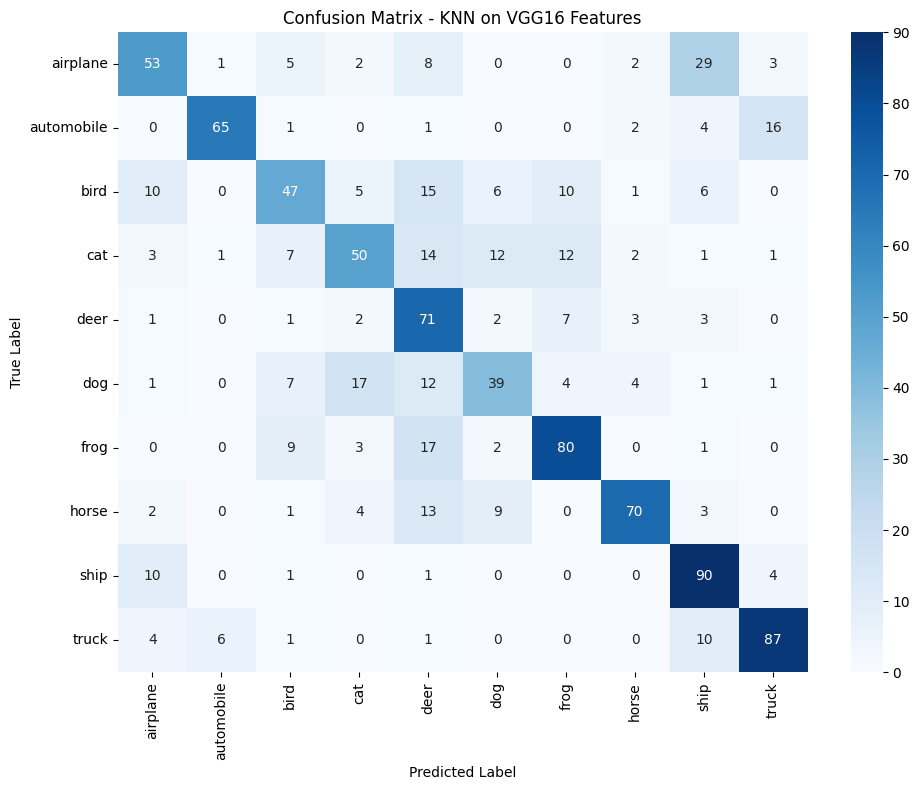


=== Training KNN on ResNet50 features ===
Training KNN classifier...
Training completed in 0.01 seconds
Evaluating on test set...
Accuracy: 0.8150
Precision (weighted): 0.8163
Recall (weighted): 0.8150
F1 Score (weighted): 0.8136

Detailed Classification Report:
              precision    recall  f1-score   support

    airplane       0.81      0.74      0.77       103
  automobile       0.77      0.89      0.83        89
        bird       0.86      0.73      0.79       100
         cat       0.71      0.72      0.71       103
        deer       0.85      0.77      0.81        90
         dog       0.80      0.70      0.75        86
        frog       0.81      0.88      0.84       112
       horse       0.86      0.90      0.88       102
        ship       0.89      0.92      0.90       106
       truck       0.80      0.89      0.84       109

    accuracy                           0.81      1000
   macro avg       0.82      0.81      0.81      1000
weighted avg       0.82      0.8

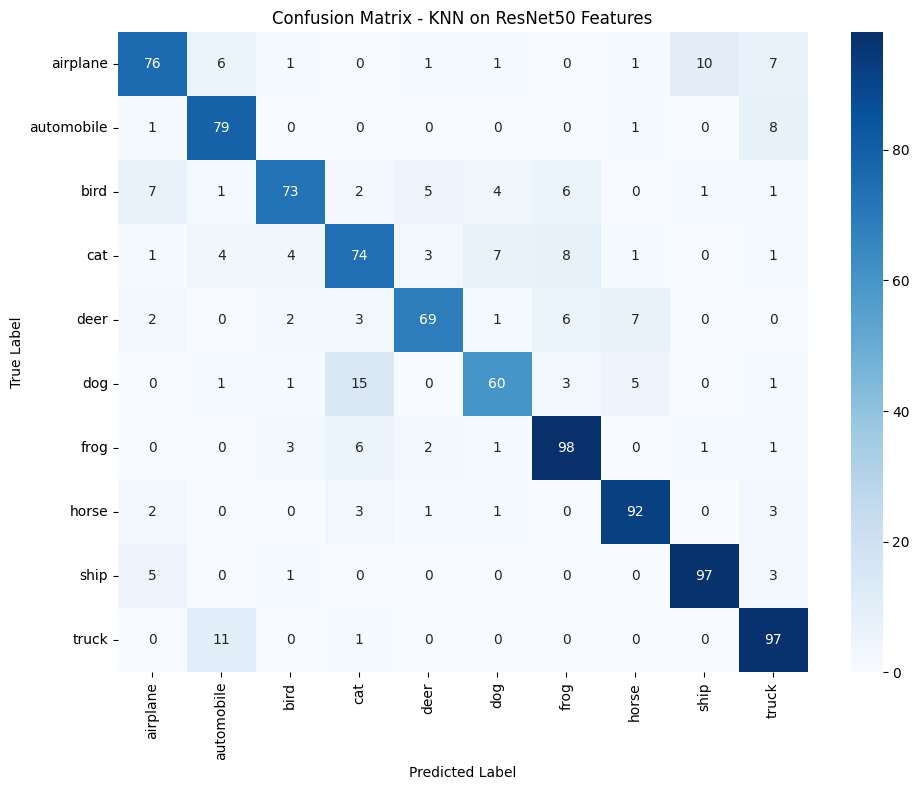

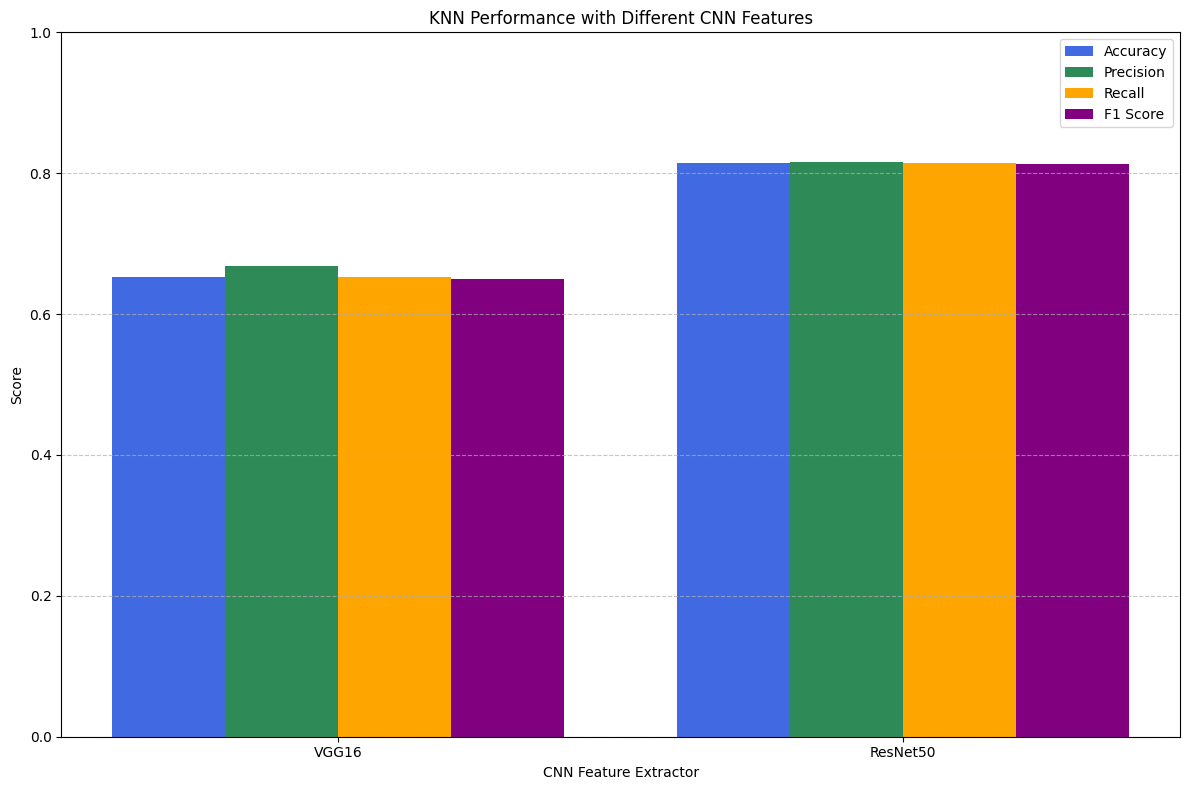

In [ ]:
import numpy as np
import time
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score, precision_recall_fscore_support
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
import os  # Import the os module

# Load features (assuming they were saved previously)
def train_and_evaluate(X_train, X_test, y_train, y_test, model_name):
    print(f"\n=== Training KNN on {model_name} features ===")

    # Initialize and train KNN
    print("Training KNN classifier...")
    start_time = time.time()

    # Use a smaller number of neighbors for high-dimensional features
    clf = KNeighborsClassifier(n_neighbors=5, weights='distance', n_jobs=-1)
    clf.fit(X_train, y_train)

    train_time = time.time() - start_time
    print(f"Training completed in {train_time:.2f} seconds")

    # Make predictions
    print("Evaluating on test set...")
    y_pred = clf.predict(X_test)

    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision, recall, f1, _ = precision_recall_fscore_support(y_test, y_pred, average='weighted')

    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision (weighted): {precision:.4f}")
    print(f"Recall (weighted): {recall:.4f}")
    print(f"F1 Score (weighted): {f1:.4f}")

    # Detailed classification report
    print("\nDetailed Classification Report:")
    class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
                   'dog', 'frog', 'horse', 'ship', 'truck']
    print(classification_report(y_test, y_pred, target_names=class_names))

    # Plot confusion matrix
    plt.figure(figsize=(10, 8))
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
    plt.title(f'Confusion Matrix - KNN on {model_name} Features')
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.tight_layout()
    plt.savefig(f'confusion_matrix_knn_{model_name.lower()}.png')
    plt.show()

    return {
        'accuracy': accuracy,
        'precision': precision,
        'recall': recall,
        'f1': f1,
        'train_time': train_time
    }

# Load previously saved features
print("Loading extracted features...")
# VGG16 features
X_train_vgg16 = np.load('cifar10_vgg16_train_features.npy')  # Load VGG16 training features
X_test_vgg16 = np.load('cifar10_vgg16_test_features.npy')   # Load VGG16 testing features

# ResNet features
X_train_resnet = np.load('cifar10_resnet50_train_features.npy') # Load ResNet50 training features
X_test_resnet = np.load('cifar10_resnet50_test_features.npy')  # Load ResNet50 testing features

# MobileNet features
mobilenet_train_features_path = 'X_train_mobilenet_features.npy'
mobilenet_test_features_path = 'X_test_mobilenet_features.npy'

# Check if MobileNet features exist, if not, skip them
if os.path.exists(mobilenet_train_features_path) and os.path.exists(mobilenet_test_features_path):
    X_train_mobilenet = np.load(mobilenet_train_features_path)  # Load MobileNet training features
    X_test_mobilenet = np.load(mobilenet_test_features_path)   # Load MobileNet testing features
else:
    print("Warning: MobileNetV2 features not found. Skipping MobileNetV2 evaluation.")
    X_train_mobilenet = None  # Or handle this case differently
    X_test_mobilenet = None

# Labels (Make sure these files exist and match the feature extraction)
y_train_subset = np.load('cifar10_train_labels_subset.npy')  # Load training labels
y_test_subset = np.load('cifar10_test_labels_subset.npy')   # Load testing labels


print("Features loaded successfully!")


# Evaluate KNN on different feature sets
results = {}

# VGG16
results['VGG16'] = train_and_evaluate(
    X_train_vgg16, X_test_vgg16, y_train_subset, y_test_subset, "VGG16")

# ResNet50
results['ResNet50'] = train_and_evaluate(
    X_train_resnet, X_test_resnet, y_train_subset, y_test_subset, "ResNet50")

# MobileNetV2 - Only evaluate if features were loaded
if X_train_mobilenet is not None and X_test_mobilenet is not None:
    results['MobileNetV2'] = train_and_evaluate(
        X_train_mobilenet, X_test_mobilenet, y_train_subset, y_test_subset, "MobileNetV2")

# Compare results
models = list(results.keys())
accuracies = [results[model]['accuracy'] for model in models]
precisions = [results[model]['precision'] for model in models]
recalls = [results[model]['recall'] for model in models]
f1_scores = [results[model]['f1'] for model in models]

# Plot comparison
plt.figure(figsize=(12, 8))
x = np.arange(len(models))
width = 0.2

plt.bar(x - width*1.5, accuracies, width, label='Accuracy', color='royalblue')
plt.bar(x - width/2, precisions, width, label='Precision', color='seagreen')
plt.bar(x + width/2, recalls, width, label='Recall', color='orange')
plt.bar(x + width*1.5, f1_scores, width, label='F1 Score', color='purple')

plt.xlabel('CNN Feature Extractor')
plt.ylabel('Score')
plt.title('KNN Performance with Different CNN Features')
plt.xticks(x, models)
plt.legend()
plt.ylim(0, 1)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.savefig('knn_comparison.png')
plt.show()